In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [2]:
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
sample_submission.head()

,row_id,place_id
0,0,3073560757 9004412889 5652080691
1,1,1652178628 4379515211 6612350960
2,2,4894407065 3920195083 7608574746
3,3,7272466660 2004687925 1455486822
4,4,4720452725 4967325204 4782917866


In [4]:
len(sample_submission.index)

8607230

In [5]:
train_set.head()

,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949


In [6]:
train_set.tail()

,row_id,x,y,accuracy,time,place_id
29118016,29118016,6.5133,1.1435,67,399740,8671361106
29118017,29118017,5.9186,4.4134,67,125480,9077887898
29118018,29118018,2.9993,6.3680,67,737758,2838334300
29118019,29118019,4.0637,8.0061,70,764975,1007355847
29118020,29118020,7.4523,2.0871,17,102842,7028698129


In [7]:
train_set.x.describe()

count    29118021.000000
mean            4.999770
std             2.857601
min             0.000000
25%             2.534700
50%             5.009100
75%             7.461400
max            10.000000
Name: x, dtype: float64

In [8]:
train_set.y.describe()

count    29118021.000000
mean            5.001814
std             2.887505
min             0.000000
25%             2.496700
50%             4.988300
75%             7.510300
max            10.000000
Name: y, dtype: float64

In [9]:
train_set.accuracy.describe()

count    29118021.000000
mean           82.849125
std           114.751772
min             1.000000
25%            27.000000
50%            62.000000
75%            75.000000
max          1033.000000
Name: accuracy, dtype: float64

In [10]:
train_set.time.describe()

count    29118021.000000
mean       417010.364723
std        231176.146498
min             1.000000
25%        203057.000000
50%        433922.000000
75%        620491.000000
max        786239.000000
Name: time, dtype: float64

In [11]:
test_set.time.describe()

count    8607230.000000
mean      890463.661617
std        64467.829800
min       786242.000000
25%       833220.000000
50%       887462.000000
75%       945491.000000
max      1006589.000000
Name: time, dtype: float64

In [12]:
train_set.place_id.describe()

count    2.911802e+07
mean     5.493787e+09
std      2.611088e+09
min      1.000016e+09
25%      3.222911e+09
50%      5.518573e+09
75%      7.764307e+09
max      9.999932e+09
Name: place_id, dtype: float64

In [13]:
unique_id = train_set.place_id.unique()

In [14]:
len(unique_id)

108390

In [15]:
train_set.place_id.value_counts().describe()

count    108390.000000
mean        268.641212
std         267.944598
min           1.000000
25%          98.000000
50%         163.000000
75%         333.000000
max        1849.000000
Name: place_id, dtype: float64

In [16]:
type(unique_id)

numpy.ndarray

In [17]:
random_index = np.random.choice(len(unique_id), 10)
random_index

array([ 18347,  66830, 105689,  37298,  67011,  40370,  81496,  96345,
        59058,  80025])

In [18]:
place1 = train_set[train_set.place_id == unique_id[random_index[8]]]

In [19]:
len(place1)

259

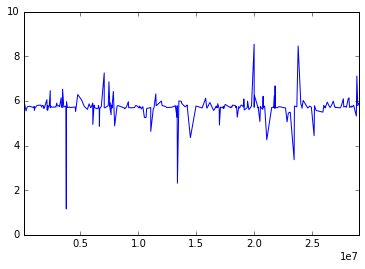

In [20]:
plt.ylim([0,10])
place1.x.plot()

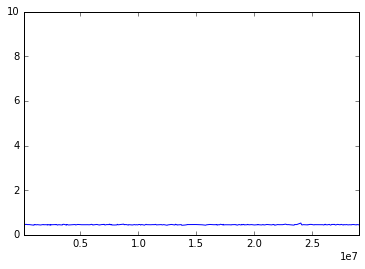

In [21]:
plt.ylim([0,10])
place1.y.plot()

In [22]:
place1.x.describe()

count    259.000000
mean       5.717378
std        0.547505
min        1.158300
25%        5.688050
50%        5.723400
75%        5.785200
max        8.538000
Name: x, dtype: float64

In [23]:
place1.y.describe()

count    259.000000
mean       0.452148
std        0.010982
min        0.426400
25%        0.444300
50%        0.452000
75%        0.458250
max        0.525900
Name: y, dtype: float64

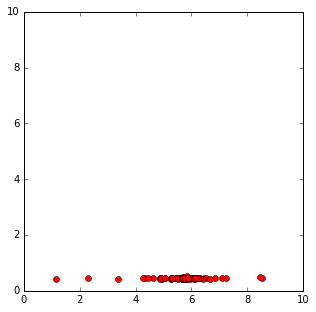

In [24]:
plt.figure(figsize=(5, 5))
plt.ylim([0,10])
plt.xlim([0,10])
plt.plot(place1.x, place1.y,'ro')

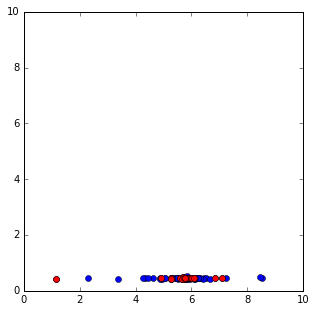

In [25]:
plt.figure(figsize=(5, 5))
plt.ylim([0,10])
plt.xlim([0,10])
plt.plot(place1.x, place1.y,'bo')
veryaccurate = place1[place1.accuracy > 100]
plt.plot(veryaccurate.x, veryaccurate.y,'ro')

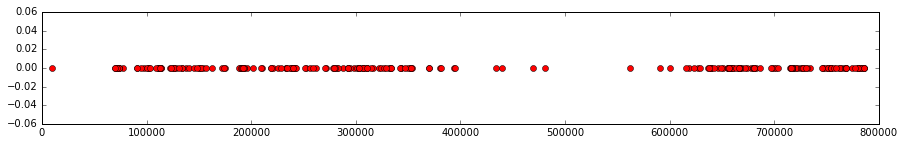

In [26]:
plt.figure(figsize=(15, 2))
plt.plot(place1.time,np.zeros_like(place1.time), 'ro')

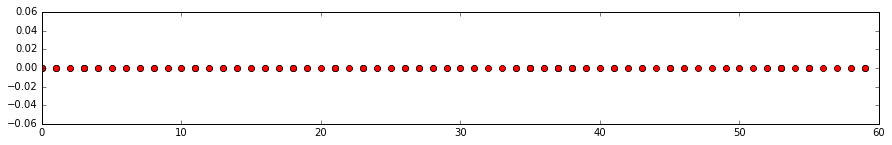

In [27]:
plt.figure(figsize=(15, 2))
plt.plot(place1.time % (60),np.zeros_like(place1.time), 'ro')

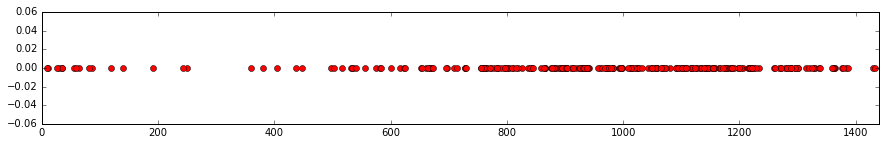

In [28]:
plt.figure(figsize=(15, 2))
plt.xlim([0,1440])
plt.plot(place1.time % (60 * 24),np.zeros_like(place1.time), 'ro')

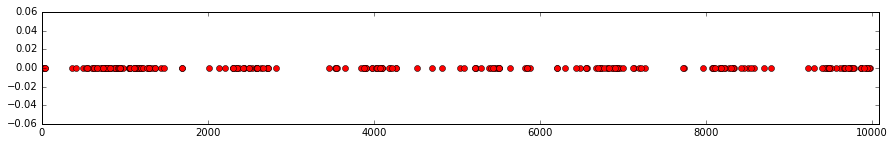

In [29]:
plt.figure(figsize=(15, 2))
plt.xlim([0,10080])
plt.plot(place1.time % (60 * 24 * 7),np.zeros_like(place1.time), 'ro')

In [30]:
test_set.head()

,row_id,x,y,accuracy,time
0,0,0.1675,1.3608,107,930883
1,1,7.3909,2.5301,35,893017
2,2,8.0978,2.3473,62,976933
3,3,0.9990,1.0591,62,907285
4,4,0.6670,9.7254,40,914399


In [31]:
not_in_filled_set = pd.read_csv('./validation_error/not_in_filled.csv')

In [32]:
not_in_filled_set.head()

,row_id,x,y,accuracy,time,place_id,p1,p2,p3
0,3,7.3665,2.5165,65,704587,6567393236,4505710601,5413763333,4223683383
1,16,3.2494,3.2096,75,777982,2123587484,6052372179,4939682720,8842957841
2,23,7.4492,8.9950,17,726403,1874355796,9745842153,3457050665,1656739680
3,34,3.1667,6.2971,32,729423,6020820466,7763320172,7043621410,4665584622
4,35,8.5522,0.5541,9,725239,7971992619,6528893632,6944345230,8900943921


In [33]:
len(not_in_filled_set.index)

1865223

In [34]:
actual_place = train_set[train_set.place_id == 6567393236]

In [35]:
actual_place

,row_id,x,y,accuracy,time,place_id
3,3,7.3665,2.5165,65,704587,6567393236
35174,35174,6.6878,2.4834,125,703260,6567393236
84734,84734,6.6697,2.5093,42,747767,6567393236
215183,215183,6.6819,2.5154,70,717601,6567393236
237593,237593,6.6959,2.5042,17,648589,6567393236
246135,246135,6.6816,2.5151,50,730793,6567393236
300520,300520,6.6842,2.5155,161,783874,6567393236
448776,448776,9.1382,2.5475,59,779767,6567393236
492887,492887,6.7153,2.5061,166,687542,6567393236
611600,611600,6.6666,2.4986,173,760968,6567393236


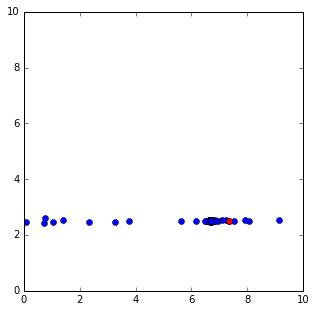

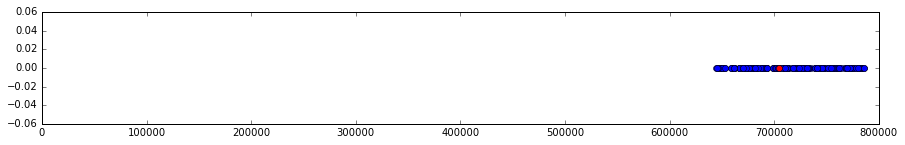

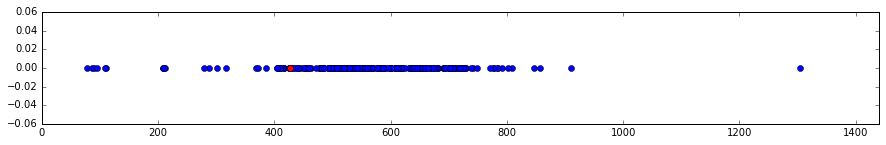

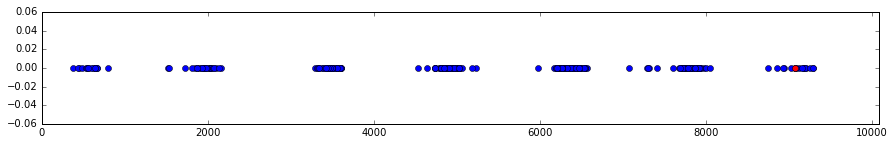

In [36]:
plt.figure(figsize=(5, 5))
plt.ylim([0,10])
plt.xlim([0,10])

plt.plot(actual_place.x, actual_place.y,'bo')
plt.plot(actual_place[actual_place.row_id == 3].x, actual_place[actual_place.row_id == 3].y,'ro')

plt.figure(figsize=(15, 2))
plt.xlim([0,800000])
plt.plot(actual_place.time,np.zeros_like(actual_place.time), 'bo')
plt.plot(actual_place[actual_place.row_id == 3].time,0, 'ro')

plt.figure(figsize=(15, 2))
plt.xlim([0,1440])
plt.plot(actual_place.time % (60 * 24),np.zeros_like(actual_place.time), 'bo')
plt.plot(actual_place[actual_place.row_id == 3].time % (60 * 24),0, 'ro')

plt.figure(figsize=(15, 2))
plt.xlim([0,10080])
plt.plot(actual_place.time % (60 * 24 * 7),np.zeros_like(actual_place.time), 'bo')
plt.plot(actual_place[actual_place.row_id == 3].time % (60 * 24 * 7),0, 'ro')

In [37]:
wrong_predict1 = train_set[train_set.place_id == 4505710601]

In [38]:
wrong_predict1

,row_id,x,y,accuracy,time,place_id
178464,178464,7.3250,2.5235,16,38333,4505710601
217412,217412,7.3445,2.5152,70,770048,4505710601
222629,222629,7.3692,2.5191,19,620319,4505710601
298830,298830,7.3463,2.5185,161,6654,4505710601
388345,388345,7.3588,2.5398,10,97459,4505710601
388942,388942,7.3632,2.5295,38,474637,4505710601
437051,437051,7.3440,2.5058,167,178341,4505710601
501994,501994,0.3503,2.6083,172,294688,4505710601
524712,524712,7.4686,2.5127,24,468657,4505710601
551028,551028,7.3127,2.5399,57,14168,4505710601
